# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [125]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data visualization
import matplotlib.pyplot as plt
# import libraries for data manipulation
import numpy as np
import pandas as pd
import seaborn as sns

### Understanding the structure of the data

In [127]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Write your code here to read the data
data = pd.read_csv("foodhub_order.csv")

CLIENTNUM
int64
Attrition_Flag
object
Customer_Age
int64
Gender
object
Dependent_count
int64
Education_Level
object
Marital_Status
object
Income_Category
object
Card_Category
object
Months_on_book
int64
Total_Relationship_Count
int64
Months_Inactive_12_mon
int64
Contacts_Count_12_mon
int64
Credit_Limit
float64
Total_Revolving_Bal
int64
Avg_Open_To_Buy
float64
Total_Amt_Chng_Q4_Q1
float64
Total_Trans_Amt
int64
Total_Trans_Ct
int64
Total_Ct_Chng_Q4_Q1
float64
Avg_Utilization_Ratio
float64
dtype: object

*CLIENTNUM: Client
number.Unique
identifier
for the customer holding the account
*Attrition_Flag: Internal
event(customer
activity) variable - if the
account is closed
then
"Attrited Customer" else "Existing Customer"
*Customer_Age: Age in Years
*Gender: Gender
of
the
account
holder
*Dependent_count: Number
of
dependents
*Education_Level: Educational
Qualification
of
the
account
holder - Graduate, High
School, Unknown, Uneducated, College(refers
to
college
student), Post-Graduate, Doctorate
*Marital_Status: Marital
Status
of
the
account
holder
*Income_Category: Annual
Income
Category
of
the
account
holder
*Card_Category: Type
of
Card
*Months_on_book: Period
of
relationship
with the bank ( in months)
*Total_Relationship_Count: Total
no.of
products
held
by
the
customer
*Months_Inactive_12_mon: No.of
months
inactive in the
last
12
months
*Contacts_Count_12_mon: No.of
Contacts in the
last
12
months
*Credit_Limit: Credit
Limit
on
the
Credit
Card
*Total_Revolving_Bal: Total
Revolving
Balance
on
the
Credit
Card
*Avg_Open_To_Buy: Open
to
Buy
Credit
Line(Average
of
last
12
months)
*Total_Amt_Chng_Q4_Q1: Change in Transaction
Amount(Q4
over
Q1)
*Total_Trans_Amt: Total
Transaction
Amount(Last
12
months)
*Total_Trans_Ct: Total
Transaction
Count(Last
12
months)
*Total_Ct_Chng_Q4_Q1: Change in Transaction
Count(Q4
over
Q1)
*Avg_Utilization_Ratio: Average
Card
Utilization
Ratio

# Write your code here to view the first 5 rows
data.head()

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
print("Number of Rows:", data.shape[0], "\nNumber of Columns:", data.shape[1])

Number of Rows: 1898 
Number of Columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
print("Datatypes of different columns in the dataset are:\n", data.dtypes)

Datatypes of different columns in the dataset are:
 order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
print(data[data.isnull()].count())
print("There are no missing values in the dataset.")

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
There are no missing values in the dataset.


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
data["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [9]:
print("Food Preparation time stats in minutes:")
print("Minimum:", data["food_preparation_time"].min(), "\nAverage:", data["food_preparation_time"].mean(), "\nMaximum:"
      , data["food_preparation_time"].max())

Food Preparation time stats in minutes:
Minimum: 20 
Average: 27.371970495258168 
Maximum: 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
print(data["rating"][data["rating"] == "Not given"].count(), "orders are not rated")

736 orders are not rated


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Numerical column analysis:
#### order_id
#### customer_id
#### cost_of_the_order
#### food_preparation_time
#### delivery_time

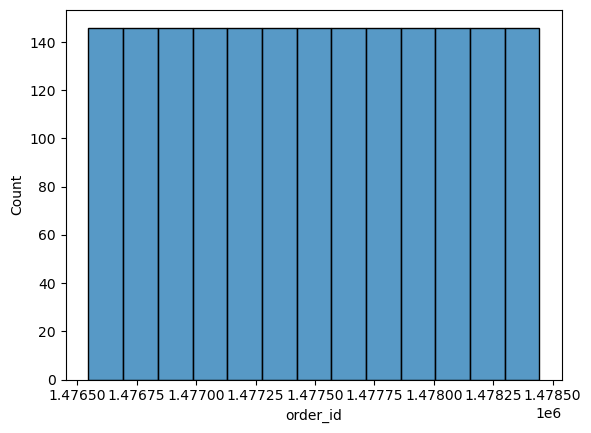

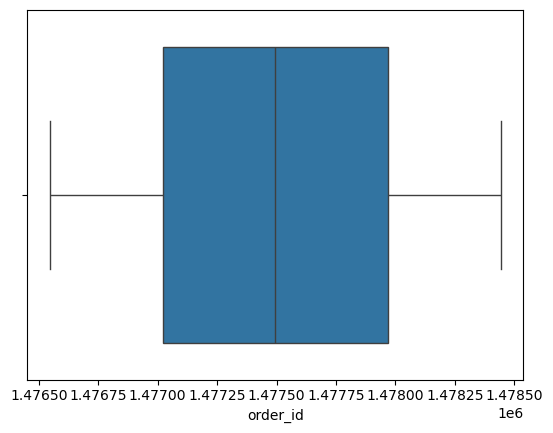

In [11]:
# Write the code here
sns.histplot(data=data, x='order_id')
plt.show()
sns.boxplot(data=data, x='order_id')
plt.show()

In [12]:
data['order_id'].describe()

count    1.898000e+03
mean     1.477496e+06
std      5.480497e+02
min      1.476547e+06
25%      1.477021e+06
50%      1.477496e+06
75%      1.477970e+06
max      1.478444e+06
Name: order_id, dtype: float64

### order_id distribution:
1) All unique
2) Not skewed
3) Evenly distributed

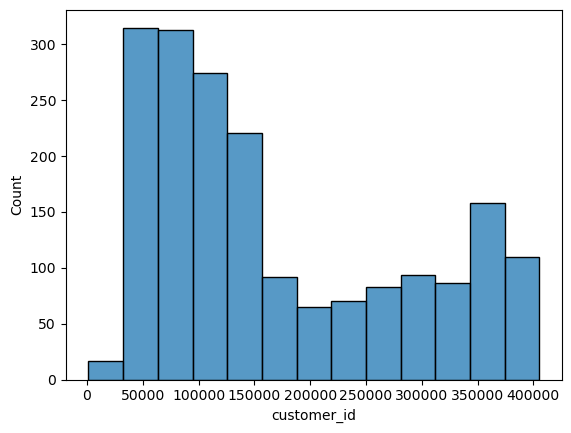

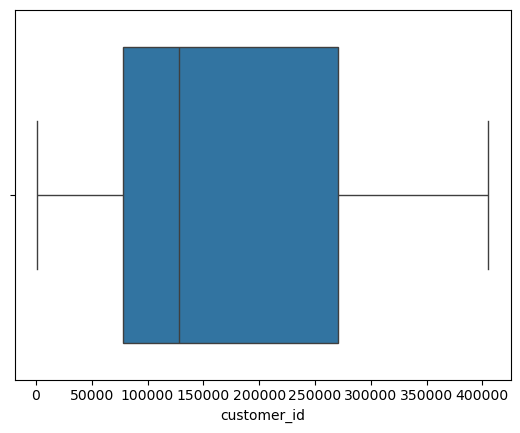

In [13]:
# Write the code here
sns.histplot(data=data, x='customer_id')
plt.show()
sns.boxplot(data=data, x='customer_id')
plt.show()

In [14]:
data["customer_id"].describe()

count      1898.000000
mean     171168.478398
std      113698.139743
min        1311.000000
25%       77787.750000
50%      128600.000000
75%      270525.000000
max      405334.000000
Name: customer_id, dtype: float64

### customer_id distribution:
1) Not all unique
2) Right skewed (mean is greater than median)
3) Unevenly distributed
4) Overall Customers with id between 30k and 160k have ordered more

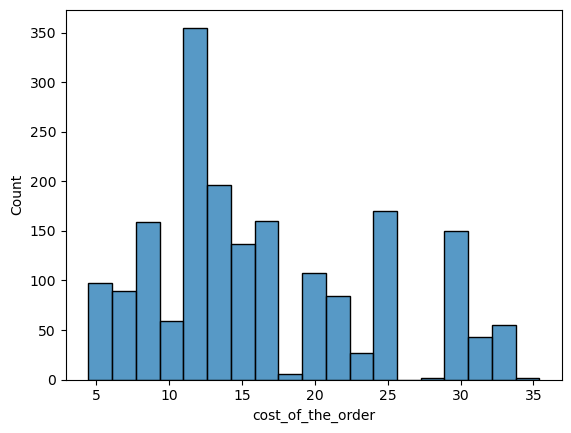

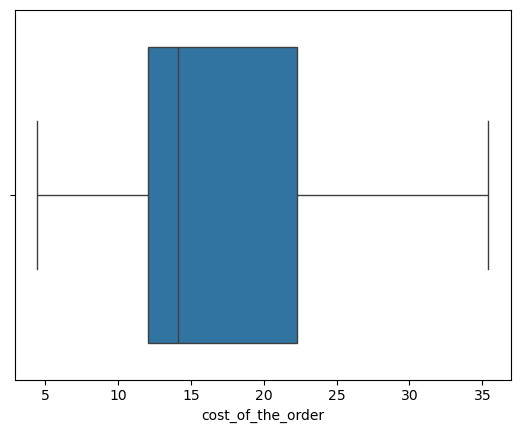

In [15]:
# Write the code here
sns.histplot(data=data, x='cost_of_the_order')
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.show()

In [16]:
data["cost_of_the_order"].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

### cost_of_the_order distribution:
1) Right skewed (mean is greater than median)
2) Orders cost is mostly on the lower side

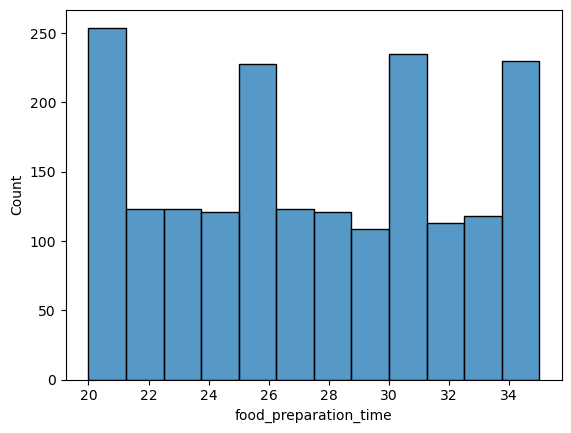

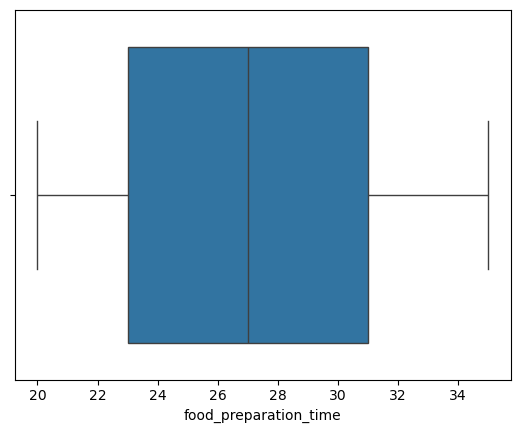

In [17]:
# Write the code here
sns.histplot(data=data, x='food_preparation_time')
plt.show()
sns.boxplot(data=data, x='food_preparation_time')
plt.show()

In [18]:
data["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

### food_preparation_time distribution:
1) Not skewed
2) Evenly distributed
3) Most orders take 27 (+-) 5 mins for preparation (rounded)

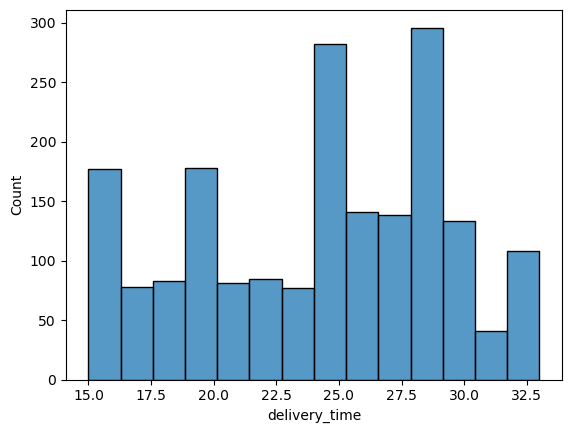

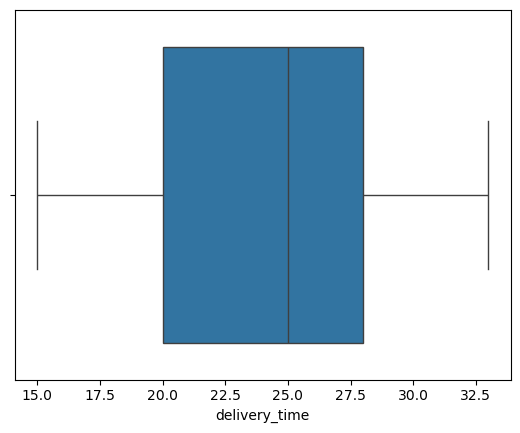

In [19]:
# Write the code here
sns.histplot(data=data, x='delivery_time')
plt.show()
sns.boxplot(data=data, x='delivery_time')
plt.show()

In [20]:
data["delivery_time"].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

### delivery_time distribution:
1) Slightly left skewed (mean < median) 
2) Most orders take 24 (+-) 5 mins for delivery (rounded)

### Categorical column analysis:
#### 1. cuisine_type
#### 2. day_of_the_week 
#### 3. rating
#### 4. restaurant_name


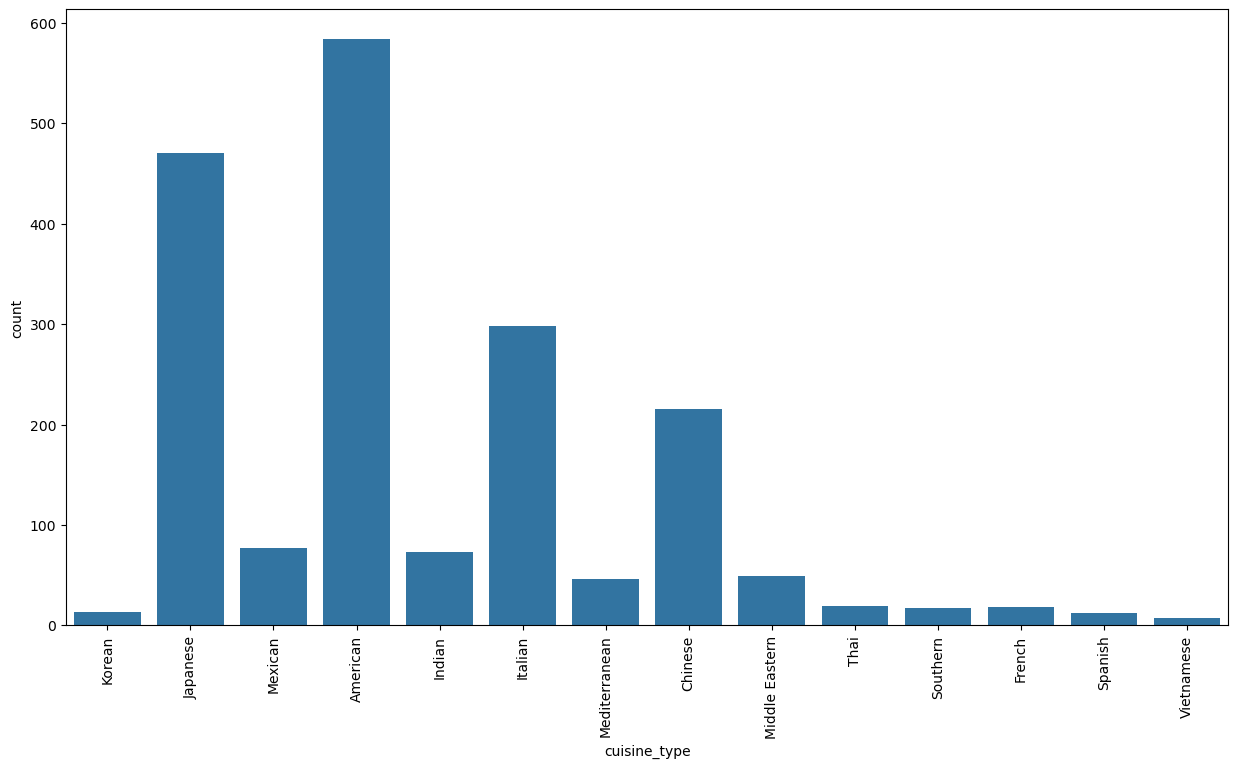

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='cuisine_type')
plt.xticks(rotation=90);

### cuisine_type Stats:
1) American Cuisine is around 32% of all orders and the highest
2) Japnese is the second highest and accounts to 24% of all the orders
3) Italian and Chinese are the next highest in the number of orders
4) Rest of all account for < 10% of all orders

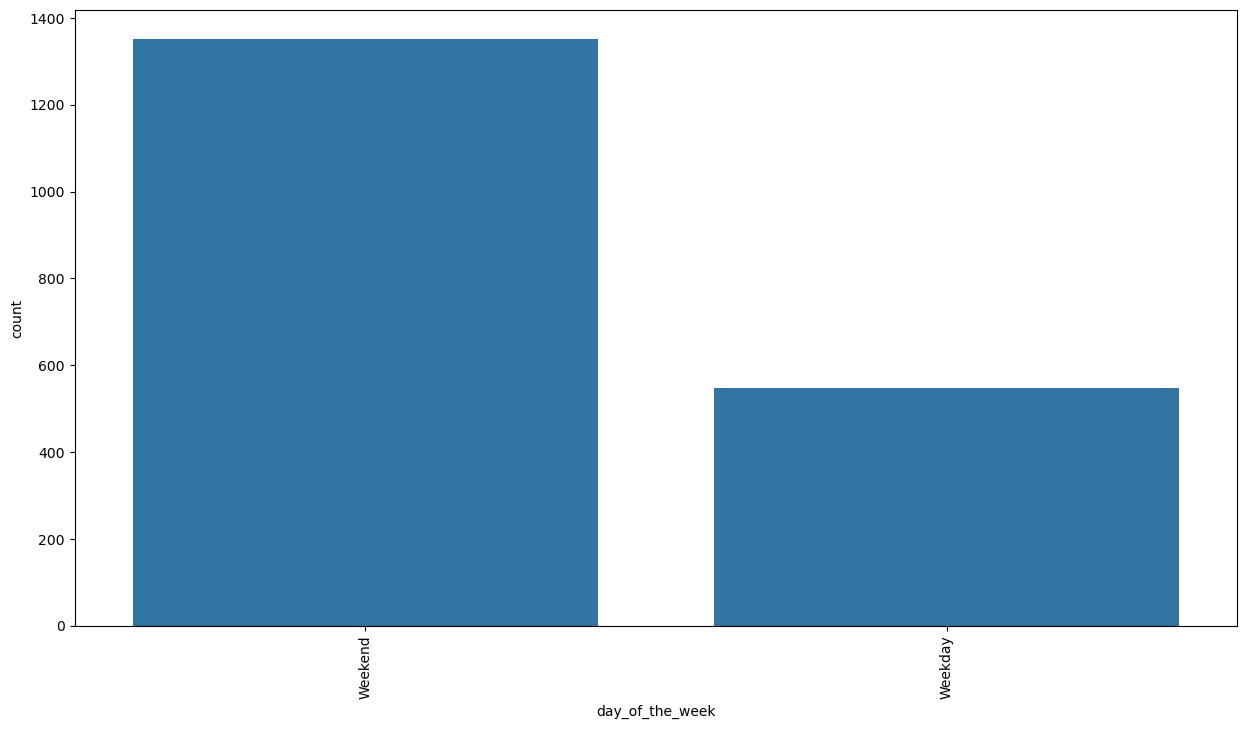

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='day_of_the_week')
plt.xticks(rotation=90);

### day_of_the_week Stats:
1) Weekend orders are around 70%, and the highest 
2) Weekday orders are around 30%, and the lowest

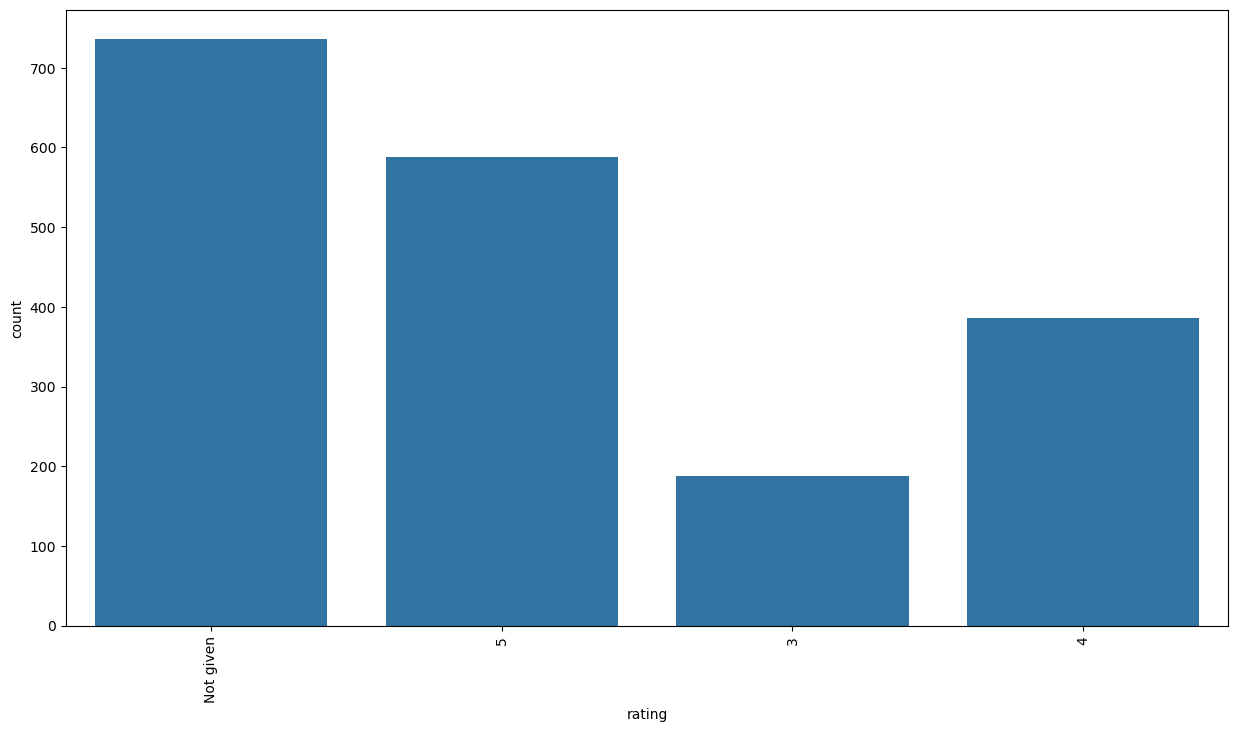

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='rating')
plt.xticks(rotation=90);

### rating Stats:
1) Almost 40% of the orders are not rated
2) Around 30%, 20% and 10% of the orders are rated 5, 4 and 3 respectively
3) Overall most (>50%) of orders quality and service seems good



In [24]:
data["restaurant_name"].value_counts().describe()

count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: count, dtype: float64

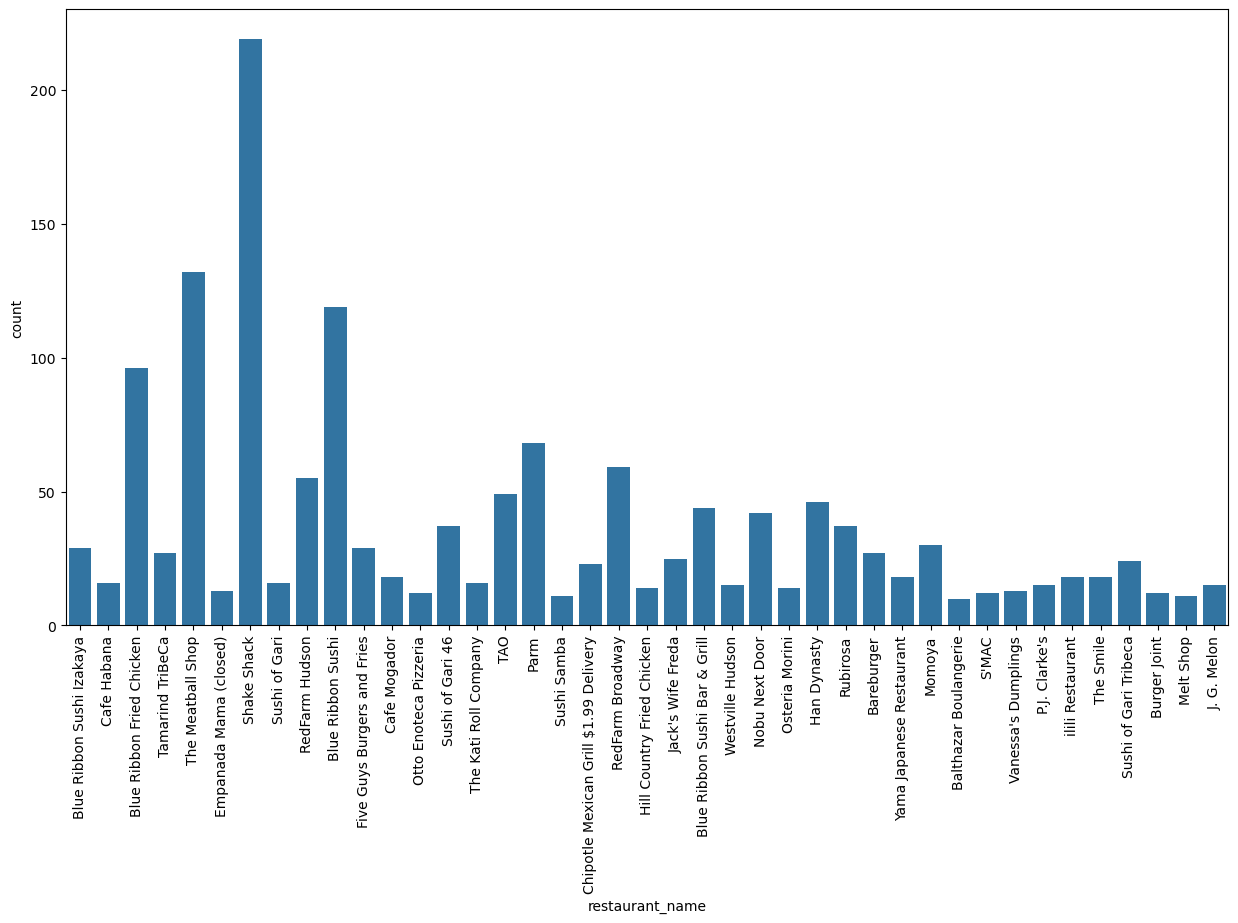

In [25]:
restaurants_with_atleast_10_orders = data["restaurant_name"].value_counts().nlargest(41).index
plt.figure(figsize=(15, 8))
sns.countplot(data=data[data["restaurant_name"].isin(restaurants_with_atleast_10_orders)], x='restaurant_name')
plt.xticks(rotation=90);

### restaurant Stats:
1) Only 23% of the restaurants get 10+ orders other 77% get < 10 orders 
2) ShakeShack restaurant accounts for 12%+ of all orders and is the highest 
3) Only 4% or 7 restaurants get 50+ orders and 11% or 19 resraurants among 178 get 25+ orders

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [26]:
# Write the code here
print("Top 5 restaurents in terms of number of orders received are:\n", data["restaurant_name"].value_counts().head(5))

Top 5 restaurents in terms of number of orders received are:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [27]:
# Write the code here
weekend_cuisine_types = data.groupby("day_of_the_week")["cuisine_type"].get_group("Weekend").value_counts()
print("Most popular Cuisine on Weekends is:", weekend_cuisine_types.keys()[0], "with", weekend_cuisine_types.values[0],
      "orders")

Most popular Cuisine on Weekends is: American with 415 orders


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

<Axes: >

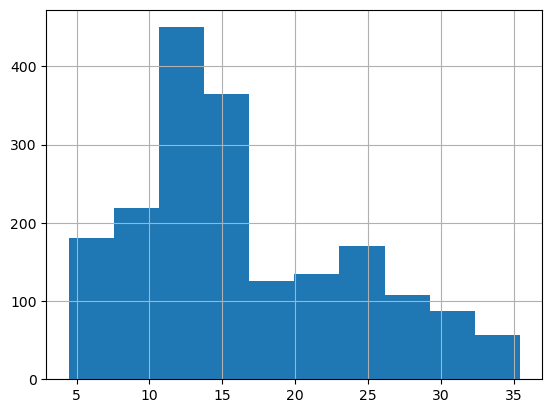

In [28]:
# Write the code here
data["cost_of_the_order"].hist()

In [29]:
print((data[data["cost_of_the_order"] > 20].count()[0] / data["cost_of_the_order"].count()) * 100, "%",
      "Orders cost more than 20 dollors", )

29.24130663856691 % Orders cost more than 20 dollors


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [30]:
# Write the code here
print("Mean order delivery time is:", data["delivery_time"].mean(), "minutes")

Mean order delivery time is: 24.161749209694417 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
# Write the code here
print("Top 3 most frequent customers by number of orders placed are:\n", data["customer_id"].value_counts().head(3))

Top 3 most frequent customers by number of orders placed are:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Lets compare the how cusines are being rated (only rated data is considered)

/var/folders/_l/ys_qvk4d5dx5k56gmdwf4k1w0000gn/T/ipykernel_74879/2448152878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_data["rating"]=rated_data["rating"].astype(int)


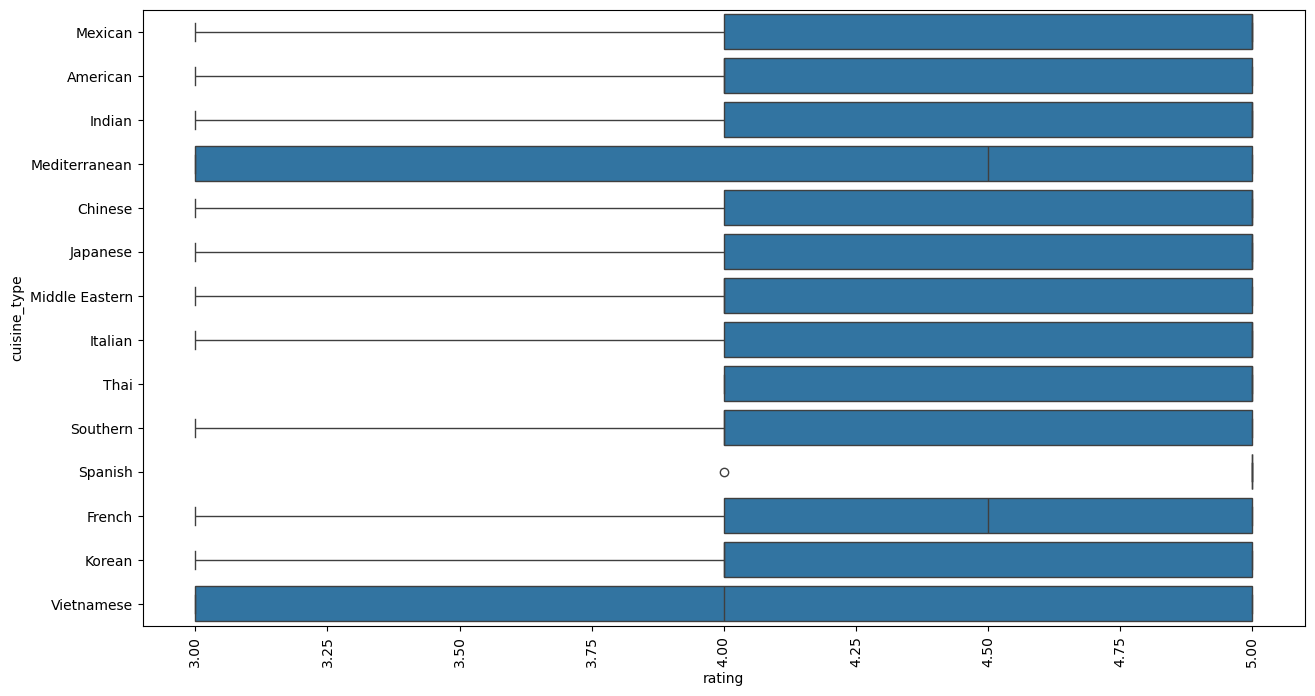

In [33]:
# Write the code here
rated_data = data[data["rating"] != "Not given"]
rated_data["rating"] = rated_data["rating"].astype(int)
plt.figure(figsize=(15, 8))
sns.boxplot(data=rated_data, x='rating', y='cuisine_type')
plt.xticks(rotation=90);

### cuisine vs ratings
1) Median ratings of all cuisines is morethan 4
2) Many cuisines are being rated either 4 or 5 except for Meditaranean and Vietnamese

In [34]:
### Lets compare the how cusines and cost are related

/var/folders/_l/ys_qvk4d5dx5k56gmdwf4k1w0000gn/T/ipykernel_74879/1323444691.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='sum')


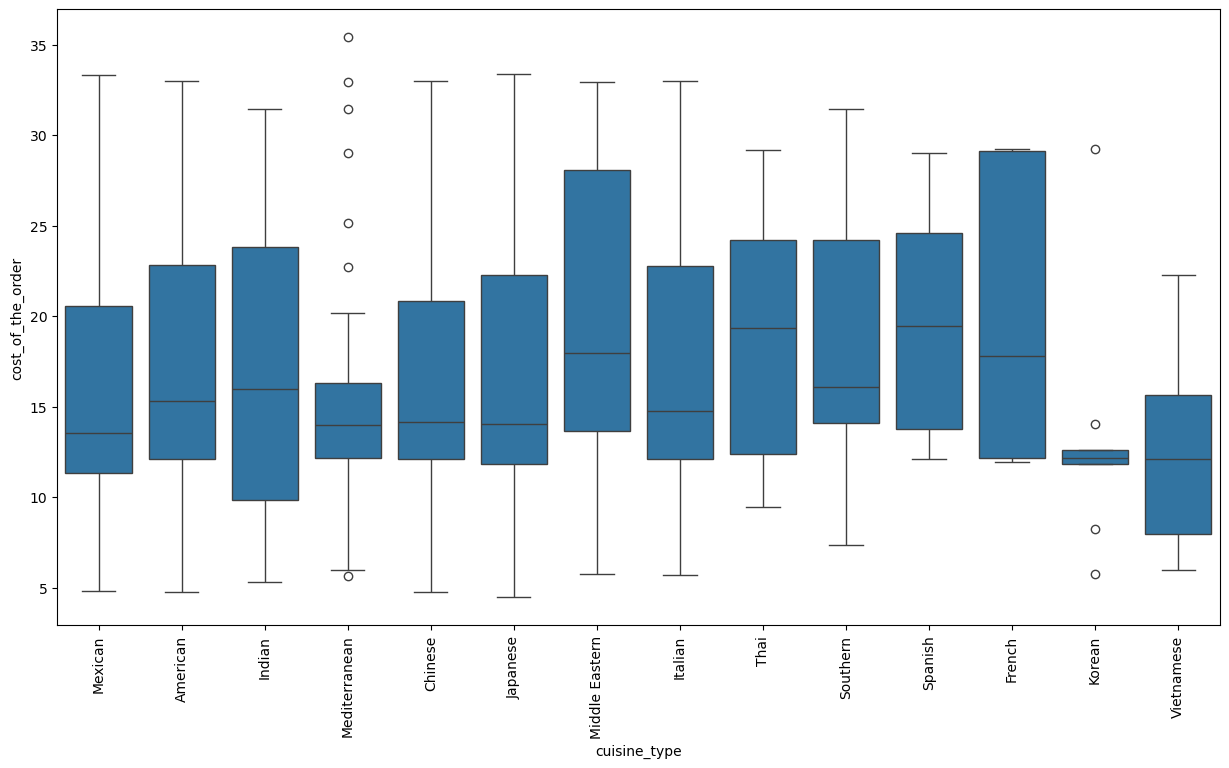

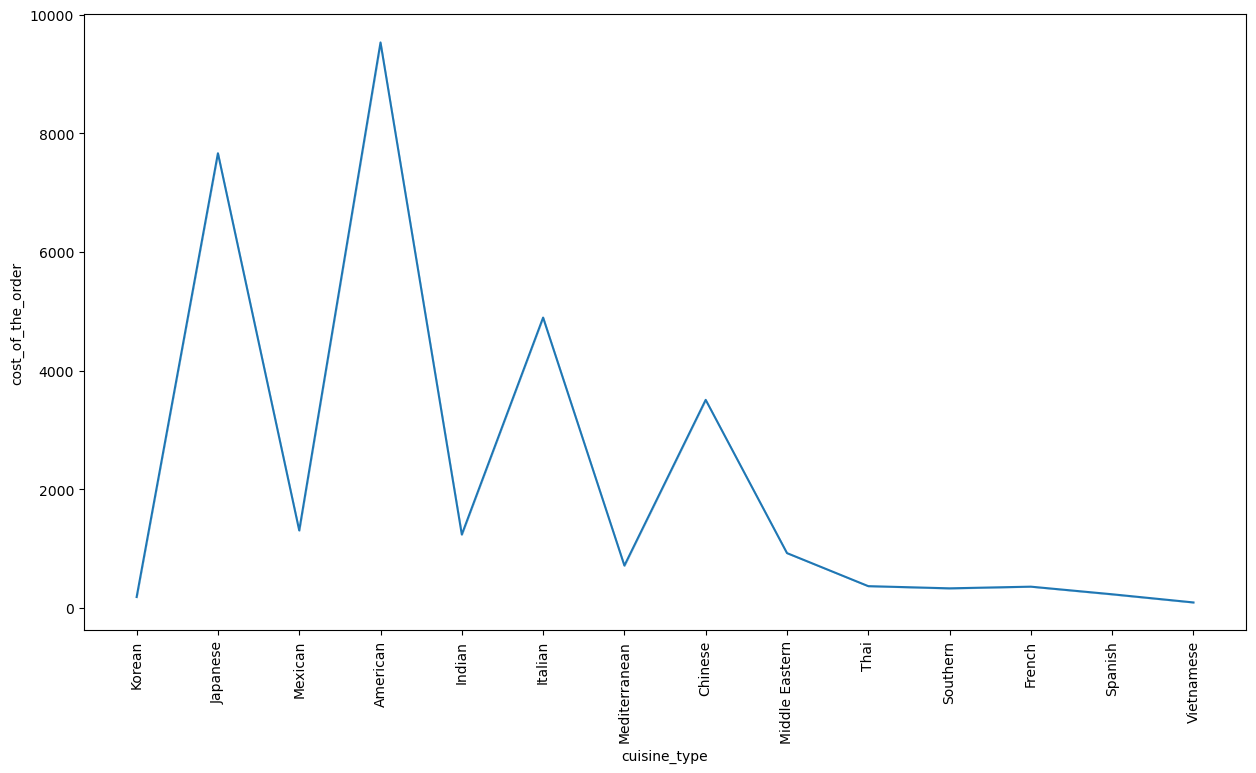

In [36]:
# Write the code here
plt.figure(figsize=(15, 8))
sns.boxplot(data=rated_data, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);
plt.figure(figsize=(15, 8))
sns.lineplot(data=data, x='cuisine_type', y='cost_of_the_order', ci=False, estimator='sum')
plt.xticks(rotation=90);

### cuisine vs cost
1) American cusine orders revenue is the higest, only American, Japnese, Italian and Chinese cuisines get most of the revenue
2) Median cost of the cuisines that generate most revenue are low compared to many others
3) Median cost of the Thai and Spanish cusines is the highest
4) Korean and Meditaranean cuisines have few outliers

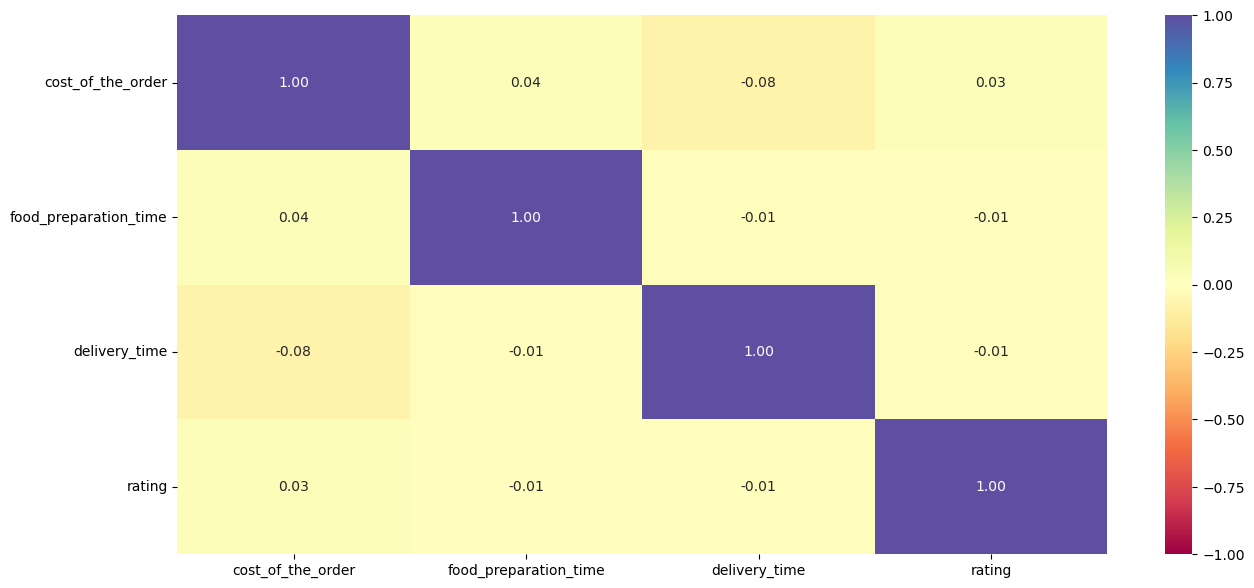

In [160]:
numerical_columns = ["cost_of_the_order", "food_preparation_time", "delivery_time", "rating"]
plt.figure(figsize=(15, 7))
sns.heatmap(rated_data[numerical_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### corelation btw  few columns
1) cost_of_the_order and the delivery+prepararion time are slightly corelated, timely food availability would bring in more revenue
2) rating is slightly related to cost_of_the_order, discounts would increase the rating

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [161]:
# Write the code here
rating_value_map = {'5': 5, '4': 4, '3': 3, '2': 2, '1': 1, 'Not given': 0}


def aggregateBasedOnRating(series, rating):
    restaurants_rating = dict()
    for index, value in series.items():
        if index[1] != 'Not given':
            if restaurants_rating.get(index[0]) is not None:
                restaurants_rating[index[0]][0] += value
                restaurants_rating[index[0]][1] += (value * rating_value_map[index[1]])
                restaurants_rating[index[0]][2] += 1
            else:
                restaurants_rating[index[0]] = [value, value * rating_value_map[index[1]], 1]

    return restaurants_rating


def findTheRestaurantsThatMeetTheOfferCriteria(restaurants_rating, ratingCount, averageRating):
    restaurants_on_offer = list()
    sorted_restaurants_based_on_rating_count = dict(
        sorted(restaurants_rating.items(), key=lambda item: item[1][0], reverse=True))
    for key, value in sorted_restaurants_based_on_rating_count.items():
        if value[0] > ratingCount:
            if value[1] / value[2] > averageRating:
                restaurants_on_offer.append(key)
        else:
            break
    return restaurants_on_offer


series = data.groupby(["restaurant_name"])["rating"].value_counts()
restaurants_rating = aggregateBasedOnRating(series, '5')

restaurants_on_offer = findTheRestaurantsThatMeetTheOfferCriteria(restaurants_rating, 50, 4)

print("Restaurants fulfilling the criteria to get the promotional offer are:\n", restaurants_on_offer)


Restaurants fulfilling the criteria to get the promotional offer are:
 ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']


### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [162]:
# Write the code here
print("Net Revenue generated by the company across all orders:",
      data[data["cost_of_the_order"] > 20]["cost_of_the_order"].sum() * 25 / 100
      + data[data['cost_of_the_order'].between(5, 20)]["cost_of_the_order"].sum() * 15 / 100)
print("Net Revenue generated by the company across all orders:",
      data[data["cost_of_the_order"] > 12]["cost_of_the_order"].sum() * 22 / 100
      + data[data['cost_of_the_order'].between(5, 12)]["cost_of_the_order"].sum() * 14 / 100)

Net Revenue generated by the company across all orders: 6166.303
Net Revenue generated by the company across all orders: 6589.0864


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [163]:
# Write the code here
data["total_time_taken_on_order"] = data["food_preparation_time"] + data["delivery_time"]
print("Percentage of orders that took morethan 60 mins for delivery:",
      data[data["total_time_taken_on_order"] > 60]["total_time_taken_on_order"].count()
      / data[data["total_time_taken_on_order"] <= 60]["total_time_taken_on_order"].count() * 100)

Percentage of orders that took morethan 60 mins for delivery: 11.778563015312132


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [164]:
# Write the code here
print("Weekends mean delivery time is ", data.groupby("day_of_the_week")["delivery_time"].mean().diff()[1],
      " minutes compare to same on weekdays")
print("Overall: Weekends mean delivery time is faster compared to weekedays")

Weekends mean delivery time is  -5.870014357297798  minutes compare to same on weekdays
Overall: Weekends mean delivery time is faster compared to weekedays


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [165]:
#print(data.groupby("cuisine_type")["cost_of_the_order"].sum())
#print(data.groupby("cuisine_type")["cost_of_the_order"].count())
#print(data.groupby("cuisine_type")["cost_of_the_order"].sum()/data.groupby("cuisine_type")["cost_of_the_order"].count())
#print(data.groupby("cuisine_type")["restaurant_name"].value_counts())
#print(data.groupby("cuisine_type")["cost_of_the_order"].describe())
#print(data.groupby("cuisine_type")["rating"].describe())
#print(data.groupby("cuisine_type")["rating"].value_counts())

### Conclusions:
*  

### Recommendations:

#### 1) 4 cusines drive most of the revenue, incrrease the number of restaurants or food items in other category
#### 2) 4% or 7 restaurants get 50+ orders, try to get the customer feedback on the other restaurants and share that with the other restaurants to increase their marketshare
#### 3) 25% of the restaurants get only 1 order, review and replace those restaurants with other options
#### 4) 77% of the restaurants get less than 10 orders review the food menu or add more restaurants withother food menu or cuisine types  
#### 5) 15% for >5$<20$ and 25% for >20$ of the cost of the order is charged but this can be changed to charge according to average cost of the order across all the cusines.
Say 14% >5$<12$ and 22% for >12$, increased revenue could be used to offer discounts
#### 6) Weekdays orders are less comapred to weekends, can run different options to provide daily commitment on food to the working people. Also, can try a new healthy/balanced diet cuisine for working people mostly on weekdays

---